# 08. Pseudo-Random Numbers, Simulating from Some Discrete and Continuous Random Variables

## [Mathematical Statistical and Computational Foundations for Data Scientists](https://lamastex.github.io/scalable-data-science/360-in-525/2018/04/)

&copy;2018 Raazesh Sainudiin. [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)


- The $Uniform(0,1)$ RV
- The $Bernoulli(\theta)$ RV
- Simulating from the $Bernoulli(\theta)$ RV
- The Equi-Probable $de\,Moivre(k)$ RV
- Simulating from the Equi-Probable $de\,Moivre(k)$ RV
- The $Uniform(\theta_1, \theta_2)$ RV
- Simulating from the $Uniform(\theta_1, \theta_2)$ RV
- The $Exponential(\lambda)$ RV
- Simulating from the $Exponential(\lambda)$ RV
- The standard $Cauchy$ RV
- Simulating from the standard $Cauchy$ RV
- Investigating running means
- Replicable samples
- A simple simulation
 

In the last notebook, we started to look at how we can produce realisations from the most elementary $Uniform(0,1)$ random variable.

i.e., how can we produce samples $(x_1, x_2, \ldots, x_n)$ from $X_1, X_2, \ldots, X_n$ $\overset{IID}{\thicksim}$ $Uniform(0,1)$?

What is SageMath doing when we ask for random()?

In [1]:
random()

0.7737778752429904

We looked at how Modular arithmetic and number theory gives us pseudo-random number generators.

We used linear congruential generators (LCG) as simple pseudo-random number generators.

Remember that "pseudo-random" means that the numbers are not really random.  We saw that some linear congruential generators (LCG) have much shorter, more predictable, patterns than others and we learned what makes a good LCG.

We introduced the pseudo-random number generator (PRNG) called the Mersenne Twister that we will use for simulation purposes in this course.  It is based on more sophisticated theory than that of LCG but the basic principles of recurrence relations are the same. 

# The $Uniform(0,1)$ Random Variable

Recall that the $Uniform(0,1)$ random variable is the fundamental model as we can transform it to any other random variable, random vector or random structure.  The PDF $f$ and DF $F$ of $X \sim Uniform(0,1)$ are:

$f(x) = \begin{cases} 0 & \text{if} \ x \notin [0,1] \\ 1 & \text{if} \ x \in [0,1] \end{cases}$

$F(x) = \begin{cases} 0 & \text{if} \ x < 0 \\ 1 & \text{if} \ x > 1 \\ x  & \text{if} \ x \in [0,1] \end{cases}$

We use the Mersenne twister pseudo-random number generator to mimic independent and identically distributed draws from the $uniform(0,1)$ RV. 

In Sage, we use the python random module to generate pseudo-random numbers for us.  (We have already used it:  remember randint?)

random() will give us one simulation from the $Uniform(0,1)$ RV:

In [2]:
random()

0.13754473484586371

If we want a whole simulated sample we can use a list comprehension.   We will be using this technique frequently so make sure you understand what is going on.   "for i in range(3)" is acting like a counter to give us 3 simulated values in the list we are making

In [3]:
[random() for i in range(3)]

[0.7168476213433062, 0.8076440633507106, 0.7968025040155092]

In [4]:
listOfUniformSamples = [random() for i in range(3) ]
listOfUniformSamples

[0.15305232923240863, 0.6139475045848862, 0.25485051424780614]

If we do this again, we will get a different sample:

In [6]:
listOfUniformSamples2 = [random() for i in range(3) ]
listOfUniformSamples2

[0.4894472551665755, 0.5741518222808246, 0.14303202101797863]

Often is it useful to be able to replicate the same random sample.   For example, if we were writing some code to do some simulations using samples from a PRNG, and we "improved" the way that we were doing it, how would we want to test our improvement?  If we could replicate the same samples then we could show that our new code was equivalent to our old code, just more efficient.  

Remember when we were using the LCGs, and we could set the seed $x_0$?  More sophisticated PRNGs like the Mersenne Twister also have a seed.  By setting this seed to a specified value we can make sure that we can replicate samples. 

In [8]:
?set_random_seed

In [9]:
set_random_seed(256526)

In [10]:
listOfUniformSamples = [random() for i in range(3) ]
listOfUniformSamples

[0.6409693377860118, 0.9433546579659949, 0.5147129803356773]

In [11]:
initial_seed()

256526L

Now we can replicate the same sample again by setting the seed to the same value:

In [12]:
set_random_seed(256526)
listOfUniformSamples2 = [random() for i in range(3) ]
listOfUniformSamples2

[0.6409693377860118, 0.9433546579659949, 0.5147129803356773]

In [13]:
initial_seed()

256526L

In [14]:
set_random_seed(2676676766)
listOfUniformSamples2 = [random() for i in range(3) ]
listOfUniformSamples2

[0.31709291282858576, 0.47750941216422715, 0.24185704293897292]

In [15]:
initial_seed()

2676676766L

We can compare some samples visually by plotting them:

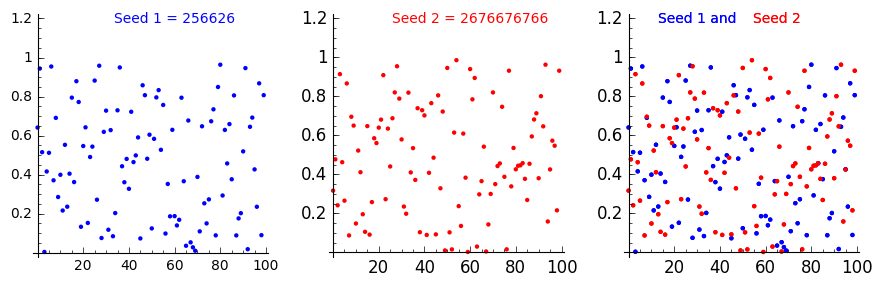

In [16]:
set_random_seed(256526)
listOfUniformSamples = [(i,random()) for i in range(100)]
plotsSeed1 = points(listOfUniformSamples)
t1 = text('Seed 1 = 256626', (60,1.2), rgbcolor='blue',fontsize=10) 
set_random_seed(2676676766)
plotsSeed2 = points([(i,random()) for i in range(100)],rgbcolor="red")
t2 = text('Seed 2 = 2676676766', (60,1.2), rgbcolor='red',fontsize=10) 
bothSeeds = plotsSeed1 + plotsSeed2
t31 = text('Seed 1 and', (30,1.2), rgbcolor='blue',fontsize=10) 
t32 = text('Seed 2', (65,1.2), rgbcolor='red',fontsize=10)
show(graphics_array( (plotsSeed1+t1,plotsSeed2+t2, bothSeeds+t31+t32)),figsize=[9,3])

### YouTry

Try looking at the more advanced documentation and play a bit.

In [17]:
?sage.misc.randstate

(end of You Try)

---

---

### Question:

What can we do with samples from a $Uniform(0,1)$ RV?  Why bother?

### Answer:

We can use them to sample or simulate from other, more complex, random variables. 

 

# The $Bernoulli(\theta)$ Random Variable

The $Bernoulli(\theta)$ RV $X$ with PMF $f(x;\theta)$ and DF $F(x;\theta)$ parameterised by some real $\theta\in [0,1]$ is a discrete random variable with only two possible outcomes. 

$f(x;\theta)= \theta^x (1-\theta)^{1-x} \mathbf{1}_{\{0,1\}}(x) =
\begin{cases}
\theta & \text{if} \ x=1,\\
1-\theta & \text{if} \ x=0,\\
0 & \text{otherwise}
\end{cases}$

$F(x;\theta) =
\begin{cases}
1 & \text{if} \ 1 \leq x,\\
1-\theta & \text{if} \ 0 \leq x < 1,\\
0 & \text{otherwise}
\end{cases}$

Here are some functions for the PMF and DF for a $Bernoulli$ RV along with various useful functions for us in the sequel. Let's take a quick look at them.

In [22]:
def bernoulliPMF(x, theta):
    '''Probability mass function for Bernoulli(theta).
    
    Param x is the value to find the Bernoulli probability mass of.
    Param theta is the theta parameterising this Bernoulli RV.'''
    
    retValue = 0
    if x == 1:
        retValue = theta
    elif x == 0:
        retValue = 1 - theta
    return retValue
    
def bernoulliCDF(x, theta):
    '''DF for Bernoulli(theta).
    
    Param x is the value to find the Bernoulli cumulative density function of.
    Param theta is the theta parameterising this Bernoulli RV.'''
    
    retValue = 0
    if x >= 1:
        retValue = 1
    elif x >= 0:
        retValue = 1 - theta
    # in the case where x < 0, retValue is the default of 0
    return retValue

# PFM plot
def pmfPlot(outcomes, pmf_values):
    '''Returns a pmf plot for a discrete distribution.'''
    
    pmf = points(zip(outcomes,pmf_values), rgbcolor="blue", pointsize='20')
    for i in range(len(outcomes)):
        pmf += line([(outcomes[i], 0),(outcomes[i], pmf_values[i])], rgbcolor="blue", linestyle=":")
    # padding
    pmf += point((0,1), rgbcolor="black", pointsize="0")
    return pmf

# CDF plot
def cdfPlot(outcomes, cdf_values):
    '''Returns a pmf plot for a discrete distribution.'''
    
    cdf_pairs = zip(outcomes, cdf_values)
    cdf = point(cdf_pairs, rgbcolor = "red", faceted = false, pointsize="20")
    for k in range(len(cdf_pairs)):
        x, kheight = cdf_pairs[k]     # unpack tuple
        previous_x = 0
        previous_height = 0
        if k > 0:
            previous_x, previous_height = cdf_pairs[k-1] # unpack previous tuple
            cdf += line([(previous_x, previous_height),(x, previous_height)], rgbcolor="grey")
            cdf += points((x, previous_height),rgbcolor = "white", faceted = true, pointsize="20")
            cdf += line([(x, previous_height),(x, kheight)], rgbcolor="blue", linestyle=":")
        
    # padding
    max_index = len(outcomes)-1
    cdf += line([(outcomes[0]-0.2, 0),(outcomes[0], 0)], rgbcolor="grey")
    cdf += line([(outcomes[max_index],cdf_values[max_index]),(outcomes[max_index]+0.2, cdf_values[max_index])], rgbcolor="grey")
    return cdf
    
def makeFreqDictHidden(myDataList):
    '''Make a frequency mapping out of a list of data.
    
    Param myDataList, a list of data.
    Return a dictionary mapping each data value from min to max in steps of 1 to its frequency count.'''
    
    freqDict = {}             # start with an empty dictionary
    sortedMyDataList = sorted(myDataList)
    for k in sortedMyDataList:
        freqDict[k] = myDataList.count(k)
    
    return freqDict # return the dictionary created

def makeEMFHidden(myDataList):
    '''Make an empirical mass function from a data list.
    
    Param myDataList, list of data to make emf from.
    Return list of tuples comprising (data value, relative frequency) ordered by data value.'''
    
    freqs = makeFreqDictHidden(myDataList)     # make the frequency counts mapping
    totalCounts = sum(freqs.values())
    relFreqs = [fr/(1.0*totalCounts) for fr in freqs.values()] # use a list comprehension
    numRelFreqPairs = zip(freqs.keys(), relFreqs) # zip the keys and relative frequencies together
    numRelFreqPairs.sort() # sort the list of tuples

    return numRelFreqPairs

from pylab import array

def makeEDFHidden(myDataList):
    '''Make an empirical distribution function from a data list.
    
    Param myDataList, list of data to make emf from.
    Return list of tuples comprising (data value, cumulative relative frequency) ordered by data value.'''
    
    freqs = makeFreqDictHidden(myDataList)     # make the frequency counts mapping
    totalCounts = sum(freqs.values())
    relFreqs = [fr/(1.0*totalCounts) for fr in freqs.values()] # use a list comprehension
    relFreqsArray = array(relFreqs)
    cumFreqs = list(relFreqsArray.cumsum())
    numCumFreqPairs = zip(freqs.keys(), cumFreqs) # zip the keys and culm relative frequencies together
    numCumFreqPairs.sort() # sort the list of tuples
    
    return numCumFreqPairs
    
# EPMF plot
def epmfPlot(samples):
    '''Returns an empirical probability mass function plot from samples data.'''
    
    epmf_pairs = makeEMFHidden(samples)
    epmf = point(epmf_pairs, rgbcolor = "blue", pointsize="20")
    for k in epmf_pairs:    # for each tuple in the list
        kkey, kheight = k     # unpack tuple
        epmf += line([(kkey, 0),(kkey, kheight)], rgbcolor="blue", linestyle=":")
    # padding
    epmf += point((0,1), rgbcolor="black", pointsize="0")
    return epmf
    

# ECDF plot
def ecdfPlot(samples):
    '''Returns an empirical probability mass function plot from samples data.'''
    ecdf_pairs = makeEDFHidden(samples)
    ecdf = point(ecdf_pairs, rgbcolor = "red", faceted = false, pointsize="20")
    for k in range(len(ecdf_pairs)):
        x, kheight = ecdf_pairs[k]     # unpack tuple
        previous_x = 0
        previous_height = 0
        if k > 0:
            previous_x, previous_height = ecdf_pairs[k-1] # unpack previous tuple
            ecdf += line([(previous_x, previous_height),(x, previous_height)], rgbcolor="grey")
            ecdf += points((x, previous_height),rgbcolor = "white", faceted = true, pointsize="20")
            ecdf += line([(x, previous_height),(x, kheight)], rgbcolor="blue", linestyle=":")
    # padding
    ecdf += line([(ecdf_pairs[0][0]-0.2, 0),(ecdf_pairs[0][0], 0)], rgbcolor="grey")
    max_index = len(ecdf_pairs)-1
    ecdf += line([(ecdf_pairs[max_index][0], ecdf_pairs[max_index][1]),(ecdf_pairs[max_index][0]+0.2, ecdf_pairs[max_index][1])],rgbcolor="grey")
    return ecdf

We can see the effect of varying $\theta$ interactively:

In [26]:
@interact
def _(theta=(0.5)):
    '''Interactive function to plot the bernoulli pmf and cdf.'''
    if theta <=1 and theta >= 0:
        outcomes = (0, 1) # define the bernoulli outcomes
        print "Bernoulli (", RR(theta).n(digits=2), ") pmf and cdf"
        # pmf plot
        pmf_values = [bernoulliPMF(x, theta) for x in outcomes]
        pmf = pmfPlot(outcomes, pmf_values) # this is one of our own, hidden, functions
        # cdf plot
        cdf_values = [bernoulliCDF(x, theta) for x in outcomes]
        cdf = cdfPlot(outcomes, cdf_values) # this is one of our own, hidden, functions
        show(graphics_array([pmf, cdf]),figsize=[8,3])
    else:
        print "0 <= theta <= 1"

Don't worry about how these plots are done:  you are not expected to be able to understand all of these details now.  

Just use them to see the effect of varying $\theta$.

## Simulating a sample from the $Bernoulli(\theta)$ RV

We can simulate a sample from a $Bernoulli$ distribution by transforming input from a $Uniform(0,1)$ distribution using the floor() function in Sage.    In maths, $\lfloor x \rfloor$,  the 'floor of  $x$' is the largest integer that is smaller than or equal to $x$.  For example, $\lfloor 3.8 \rfloor = 3$.

In [27]:
z=3.8
floor(z)

3

Using floor, we can do inversion sampling from the $Bernoulli(\theta)$ RV using the the $Uniform(0,1)$ random variable that we said is the fundamental model.

We will introduce inversion sampling more formally later.  In general, inversion sampling means using the inverse of the CDF $F$, $F^{[-1]}$, to transform input from a $Uniform(0,1)$ distribution. 

To simulate from the $Bernoulli(\theta)$, we can use the following algorithm:

### Input:

- $u \thicksim Uniform(0,1)$ from a PRNG,   $\qquad \qquad \text{where, } \sim$ means "sample from"
- $\theta$, the parameter

### Output:

$x \thicksim Bernoulli(\theta)$

### Steps:

- $u \leftarrow Uniform(0,1)$
- $x \leftarrow  \lfloor u + \theta \rfloor$
- Return $x$

 We can illustrate this with SageMath:

In [28]:
theta = 0.5 # theta must be such that 0 <= theta <= 1
u = random()
x = floor(u + theta)
x

0

To make  a number of simulations, we can use list comprehensions again:

In [29]:
theta = 0.5
n = 20
randomUs = [random() for i in range(n)]
simulatedBs = [floor(u + theta) for u in randomUs]
simulatedBs

[0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

To make modular reusable code we can package up what we have done as functions. 

The function `bernoulliFInverse(u, theta)` codes the inverse of the CDF of a Bernoulli distribution parameterised by `theta`.  The function `bernoulliSample(n, theta)` uses `bernoulliFInverse(...)` in a list comprehension to simulate n samples from a Bernoulli distribution parameterised by theta, i.e., the distribution of our $Bernoulli(\theta)$ RV.

In [31]:
def bernoulliFInverse(u, theta):
    '''A function to evaluate the inverse CDF of a bernoulli.
    
    Param u is the value to evaluate the inverse CDF at.
    Param theta is the distribution parameters.
    Returns inverse CDF under theta evaluated at u'''
    
    return floor(u + theta)
    
def bernoulliSample(n, theta):
    '''A function to simulate samples from a bernoulli distribution.
    
    Param n is the number of samples to simulate.
    Param theta is the bernoulli distribution parameter.
    Returns a simulated Bernoulli sample as a list'''
    
    us = [random() for i in range(n)]
    
    return [bernoulliFInverse(u, theta) for u in us] # use bernoulliFInverse in a list comprehension

Note that we are using a list comprehension and the built-in SageMath `random()` function to make a list of pseudo-random simulations from the $Uniform(0,1)$.  The length of the list is determined by the value of n.  Inside the body of the function we assign this list to a variable named `us` (i.e., u plural).  We then use another list comprehension to make our simulated sample.  This list comprehension works by calling our function `bernoulliFInverse(...)` and passing in values for theta together with each u in us in turn.

Let's try a small number of samples:

In [32]:
theta = 0.2
n = 10
samples = bernoulliSample(n, theta)
samples

[0, 0, 0, 1, 0, 1, 0, 0, 0, 1]

Now lets explore the effect of interactively varying n and $\theta$:

In [33]:
@interact
def _(theta=(0.5), n=(10,(0..1000))):
    '''Interactive function to plot samples from bernoulli distribution.'''
    if theta >= 0 and theta <= 1:
        print "epmf and ecdf for ", n, " samples from Bernoulli (", theta, ")"
        samples = bernoulliSample(n, theta)
        # epmf plot
        epmf = epmfPlot(samples) # this is one of our hidden functions
        # ecdf plot
        ecdf = ecdfPlot(samples)  # this is one of our hidden functions
        show(graphics_array([epmf, ecdf]),figsize=[8,3])
    else:
        print "0 <= theta <=1, n>0"

You can vary $\theta$ and $n$ on the interactive plot.  You should be able to see that as $n$ increases, the empirical plots should get closer to the theoretical $f$ and $F$. 



### YouTry

Check that you understand what `floor` is doing.  We have put some extra print statements into our demonstration of floor so that you can see what is going on in each step.  Try evaluating this cell several times so that you see what happens with different values of `u`.

In [34]:
theta = 0.5 # theta must be such that 0 <= theta <= 1
u = random()
print "u is", u
print "u + theta is", (u + theta)
print "floor(u + theta) is", floor(u + theta)

u is 0.634132126453
u + theta is 1.13413212645321
floor(u + theta) is 1


In the cell below we use floor to get 1's and 0's from the pseudo-random u's given by random().  It is effectively doing exactly the same thing as the functions above that we use to simulate a specified number of $Bernoulli(\theta)$ RVs, but the why that it is written may be easier to understand.  If `floor` is doing what we want it to, then when `n` is sufficiently large, we'd expect our proportion of `1`s to be close to `theta` (remember Kolmogorov's axiomatic motivations for probability!).  Try changing the value assigned to the variable `theta` and re-evaluting the cell to check this.  

In [35]:
theta = 0.7 # theta must be such that 0 <= theta <= 1
listFloorResults = [] # an empty list to store results in
n = 100000    # how many iterations to do
for i in range(n): # a for loop to do something n times
    u = random() # generate u
    x = floor(u + theta) # use floor
    listFloorResults.append(x) # add x to the list of results
listFloorResults.count(1)*1.0/len(listFloorResults) # proportion of 1s in the results

0.699650000000000

# The equi-probable $de~Moivre(\theta)$ Random Variable

The $de~Moivre(\theta_1,\theta_2,\ldots,\theta_k)$ RV is the natural generalisation of the $Bernoulli (\theta)$ RV to more than two outcomes.  Take a die (i.e. one of a pair of dice): there are 6 possible outcomes from tossing a die if the die is a normal six-sided one (the outcome is which face is the on the top).  To start with we can allow the possibility that the different faces could be loaded so that they have different probabilities of being the face on the top if we throw the die.  In this case, k=6 and the parameters $\theta_1$, $\theta_2$, ...$\theta_6$ specify how the die is loaded, and the number on the upper-most face if the die is tossed is a $de\,Moivre$ random variable parameterised by $\theta_1,\theta_2,\ldots,\theta_6$. 

If $\theta_1=\theta_2=\ldots=\theta_6= \frac{1}{6}$ then we have a fair die.

Here are some functions for the equi-probable $de\, Moivre$ PMF and CDF where we code the possible outcomes as the numbers on the faces of a k-sided die, i.e, 1,2,...k.

In [36]:
def deMoivrePMF(x, k):
    '''Probability mass function for equi-probable de Moivre(k).
    
    Param x is the value to evaluate the deMoirve pmf at.
    Param k is the k parameter for an equi-probable deMoivre.
    Returns the evaluation of the deMoivre(k) pmf at x.'''
    
    if (int(x)==x) & (x > 0) & (x <= k):
        return 1.0/k
    else:
        return 0
    
def deMoivreCDF(x, k):
    '''DF for equi-probable de Moivre(k).
    
    Param x is the value to evaluate the deMoirve cdf at.
    Param k is the k parameter for an equi-probable deMoivre.
    Returns the evaluation of the deMoivre(k) cdf at x.'''
    
    return 1.0*x/k

In [37]:
@interact
def _(k=(6)):
    '''Interactive function to plot the de Moivre pmf and cdf.'''
    if (int(k) == k) and (k >= 1):
        outcomes = range(1,k+1,1) # define the outcomes
        pmf_values = [deMoivrePMF(x, k) for x in outcomes]
        print "equi-probable de Moivre (", k, ") pmf and cdf"
        # pmf plot
        pmf = pmfPlot(outcomes, pmf_values) # this is one of our hidden functions
        
        # cdf plot
        cdf_values = [deMoivreCDF(x, k) for x in outcomes]
        cdf = cdfPlot(outcomes, cdf_values) # this is one of our hidden functions
        
        show(graphics_array([pmf, cdf]),figsize=[8,3])
    else:
        print "k must be an integer, k>0"

### YouTry
Try changing the value of k in the above interact.

## Simulating a sample from the equi-probable $de\,Moivre(k)$ random variable

We use floor ($\lfloor \, \rfloor$) again for simulating from the equi-probable $de \, Moivre(k)$ RV, but because we are defining our outcomes as 1, 2, ... k, we just add 1 to the result.  

In [38]:
k = 6
u = random()
x = floor(u*k)+1
x

2

To simulate from the equi-probable $de\,Moivre(k)$, we can use the following algorithm:

#### Input:

- $u \thicksim Uniform(0,1)$ from a PRNG
- $k$, the parameter

#### Output:

- $x \thicksim \text{equi-probable } de \, Moivre(k)$

#### Steps:

- $u \leftarrow Uniform(0,1)$
- $x \leftarrow \lfloor uk \rfloor + 1$
- return $x$

We can illustrate this with SageMath:

In [39]:
def deMoivreFInverse(u, k):
    '''A function to evaluate the inverse CDF of an equi-probable de Moivre.
    
    Param u is the value to evaluate the inverse CDF at.
    Param k is the distribution parameter.
    Returns the inverse CDF for a de Moivre(k) distribution evaluated at u.'''
    
    return floor(k*u) + 1

def deMoivreSample(n, k):
    '''A function to simulate samples from an equi-probable de Moivre.
    
    Param n is the number of samples to simulate.
    Param k is the bernoulli distribution parameter.
    Returns a simulated sample of size n from an equi-probable de Moivre(k) distribution as a list.'''
    
    us = [random() for i in range(n)]
    
    return [deMoivreFInverse(u, k) for u in us]

A small sample:

In [40]:
deMoivreSample(10,6)

[6, 3, 3, 5, 3, 1, 6, 5, 3, 4]

You should understand the `deMoivreFInverse` and `deMoivreSample` functions and be able to write something like them if you were asked to. 

You are not expected to be to make the interactive plots below (but this is not too hard to do by syntactic mimicry and google searches!). 

Now let's do some interactive sampling where you can vary $k$ and the sample size $n$:

In [41]:
@interact
def _(k=(6), n=(10,(0..500))):
    '''Interactive function to plot samples from equi-probable de Moivre distribution.'''
    if n > 0 and k >= 0 and int(k) == k:
        print "epmf and ecdf for ", n, " samples from equi-probable de Moivre (", k, ")"
        outcomes = range(1,k+1,1) # define the outcomes
        samples = deMoivreSample(n, k) # get the samples
        epmf = epmfPlot(samples) # this is one of our hidden functions
        
        ecdf = ecdfPlot(samples) # this is one of our hidden functions
        
        show(graphics_array([epmf, ecdf]),figsize=[10,3])
    else:
        print "k>0 must be an integer, n>0"

Try changing $n$ and/or $k$.  With $k = 40$ for example, you could be simulating the number on the first ball for $n$ Lotto draws.

### YouTry

A useful counterpart to the floor of a number is the ceiling, denoted $\lceil \, \rceil$.  In maths, $\lceil x \rceil$,  the 'ceiling of  $x$' is the smallest integer that is larger than or equal to $x$.  For example, $\lceil 3.8 \rceil = 4$.  We can use the ceil function to do this in Sage:

In [42]:
ceil(3.8)

4

Try using `ceil` to check that you understand what it is doing.  What would `ceil(0)` be?  

# Inversion Sampler for Continuous Random Variables

When we simulated from the discrete RVs above, the $Bernoulli(\theta)$ and the equi-probable $de\,Moivre(k)$, we transformed some $u \thicksim Uniform(0,1)$ into some value for the RV.  

Now we will look at the formal idea of an inversion sampler for continuous random variables.  Inversion sampling for continuous random variables is a way to simulate values for a continuous random variable $X$ using $u \thicksim Uniform(0,1)$. 

The idea of the inversion sampler is to treat $u \thicksim Uniform(0,1)$ as some value taken by the CDF $F$ and find the value $x$ at which $F(X \le x) = u$.

To find x where $F(X \le x) = u$ we need to use the inverse of $F$, $F^{[-1]}$.  This is why it is called an **inversion sampler**.

Formalising this,

### Proposition

Let $F(x) := \int_{- \infty}^{x} f(y) \,d y : \mathbb{R} \rightarrow [0,1]$ be a continuous DF with density $f$, and let its inverse $F^{[-1]} $ be:

$$ F^{[-1]}(u) := \inf \{ x : F(x) = u \}  : [0,1] \rightarrow \mathbb{R} $$

Then, $F^{[-1]}(U)$ has the distribution function $F$, provided $U \thicksim Uniform(0,1)$ ($U$ is a $Uniform(0,1)$ RV).

Note:

The infimum of a set A of real numbers, denoted by $\inf(A)$, is the greatest lower bound of every element of $A$.

Proof

The ``one-line proof'' of the proposition is due to the following equalities: 

$$P(F^{[-1]}(U) \leq x) = P(\inf \{ y : F(y) = U)\} \leq x ) = P(U \leq F(x)) = F(x), \quad \text{for all } x \in \mathbb{R} . $$

# Algorithm for Inversion Sampler

#### Input:

- A PRNG for $Uniform(0,1)$ samples
- A procedure to give us $F^{[-1]}(u)$, inverse of the DF of the target RV $X$ evaluated at $u$

#### Output:

- A sample $x$ from $X$ distributed according to $F$

#### Algorithm steps:

- Draw $u \sim Uniform(0,1)$
- Calculate $x = F^{[-1]}(u)$
- The $Uniform(\theta_1, \theta_2)$RV

We have already met the$Uniform(\theta_1, \theta_2)$ RV.

Given two real parameters $\theta_1,\theta_2 \in \mathbb{R}$, such that $\theta_1 < \theta_2$, the PDF of the $Uniform(\theta_1,\theta_2)$ RV $X$ is:

$$f(x;\theta_1,\theta_2) =
\begin{cases}
\frac{1}{\theta_2 - \theta_1} & \text{if }\theta_1 \leq x \leq \theta_2\text{,}\\
0 & \text{otherwise}
\end{cases}
$$

and its DF given by $F(x;\theta_1,\theta_2) = \int_{- \infty}^x f(y; \theta_1,\theta_2) \, dy$ is:

$$
F(x; \theta_1,\theta_2) =
\begin{cases}
0 & \text{if }x < \theta_1 \\
\frac{x-\theta_1}{\theta_2-\theta_1} & \text{if}~\theta_1 \leq x \leq \theta_2,\\
1 & \text{if} x > \theta_2 
\end{cases}
$$

For example, here are the PDF, CDF and inverse CDF for the $Uniform(-1,1)$:

<img src="images/UniformMinus11ThreeCharts.png" width=800>

As usual, we can make some SageMath functions for the PDF and CDF:

In [43]:
# uniform pdf
def uniformPDF(x, theta1, theta2):
    '''Uniform(theta1, theta2) pdf function f(x; theta1, theta2).
    
    x is the value to evaluate the pdf at.
    theta1, theta2 are the distribution parameters.'''
    
    retvalue = 0 # default return value
    if x >= theta1 and x <= theta2:
        retvalue = 1.0/(theta2-theta1)
    return retvalue

# uniform cdf        
def uniformCDF(x, theta1, theta2):
    '''Uniform(theta1, theta2) CDF or DF function F(x; theta1, theta2).
    
    x is the value to evaluate the cdf at.
    theta1, theta2 are the distribution parameters.'''
    
    retvalue = 0 # default return value
    if (x > theta2):
        retvalue = 1
    elif (x > theta1): # else-if
        retvalue =  (x - theta1) / (theta2-theta1)   
    # if (x < theta1), retvalue will be 0
    return retvalue

Using these functions in an interactive plot, we can see the effect of changing the distribution parameters $\theta_1$ and $\theta_2$.

In [46]:
@interact
def InteractiveUniformPDFCDFPlots(theta1=0,theta2=1):
    if theta2 > theta1:
        print "Uniform(", + RR(theta1).n(digits=2), ",", RR(theta2).n(digits=2), ") pdf and cdf"
        p1 = line([(theta1-1,0), (theta1,0)], rgbcolor='blue')
        p1 += line([(theta1,1/(theta2-theta1)), (theta2,1/(theta2-theta1))], rgbcolor='blue')
        p1 += line([(theta2,0), (theta2+1,0)], rgbcolor='blue')
        
        p2 = line([(theta1-1,0), (theta1,0)], rgbcolor='red')
        p2 += line([(theta1,0), (theta2,1)], rgbcolor='red')
        p2 += line([(theta2,1), (theta2+1,1)], rgbcolor='red')
        show(graphics_array([p1, p2]),figsize=[8,3])
    else:
        print "theta2 must be greater than theta1"

# Simulating from the $Uniform(\theta_1, \theta_2)$ RV

We can simulate from the $Uniform(\theta_1,\theta_2)$ using the inversion sampler, provided that we can get an expression for $F^{[-1]}$ that can be implemented as a procedure. 

We can get this by solving for $x$ in terms of $u=F(x;\theta_1,\theta_2)$:

$$
u = \frac{x-\theta_1}{\theta_2-\theta_1} \quad \iff  \quad x = (\theta_2-\theta_1)u+\theta_1 \quad  \iff \quad  F^{[-1]}(u;\theta_1,\theta_2) = \theta_1+(\theta_2-\theta_1)u 
$$

<img src="images/Week7InverseUniformSampler.png" width=600>

## Algorithm for Inversion Sampler for the $Uniform(\theta_1, \theta_2)$ RV

#### Input:

- $u \thicksim Uniform(0,1)$
- $F^{[-1]}(u)$
- $\theta_1$, $\theta_2$

#### Output:

- A sample $x \thicksim Uniform(\theta_1, \theta_2)$

#### Algorithm steps:

- Draw $u \sim Uniform(0,1)$
- Calculate $x = F^{[-1]}(u) = (\theta_1 + u(\theta_2 - \theta_1))$
- Return $x$

We can illustrate this with SageMath by writing a function to calculate the inverse of the CDF of a uniform distribution parameterised by theta1 and theta2.  Given a value between 0 and 1 for the parameter u, it returns the height of the inverse CDF at this point, i.e. the value in the range theta1 to theta2 where the CDF evaluates to u.


In [47]:
def uniformFInverse(u, theta1, theta2):
    '''A function to evaluate the inverse CDF of a uniform(theta1, theta2) distribution.
    
    u, u should be 0 <= u <= 1, is the value to evaluate the inverse CDF at.
    theta1, theta2, theta2 > theta1, are the uniform distribution parameters.'''
    
    return theta1 + (theta2 - theta1)*u

This function transforms a single $u$ into a single simulated value from the $Uniform(\theta_1, \theta_2)$, for example:

In [48]:
u = random()
theta1, theta2 = 3, 6
uniformFInverse(u, theta1, theta2)

4.386151426648391

Then we can use this function inside another function to generate a number of samples:

In [49]:
def uniformSample(n, theta1, theta2):
    '''A function to simulate samples from a uniform distribution.
    
    n > 0 is the number of samples to simulate.
    theta1, theta2 (theta2 > theta1) are the uniform distribution parameters.'''
    
    us = [random() for i in range(n)]
    
    return [uniformFInverse(u, theta1, theta2) for u in us]

The basic strategy is the same as for simulating $Bernoulli$ and $de \, Moirve$ samples:  we are using a list comprehension and the built-in SAGE random() function to make a list of pseudo-random simulations from the $Uniform(0,1)$.  The length of the list is determined by the value of n.  Inside the body of the function we assign this list to a variable named us (i.e., u plural).  We then use another list comprehension to make our simulated sample.  This list comprehension works by calling our function uniformFInverse(...) and passing in values for theta1 and theta2 together with each u in us in turn.

You should be able to write simple functions like uniformFinverse and uniformSample yourself.

Try this for a small sample:

In [51]:
param1 = -5
param2 = 5
nToGenerate = 30
myUniformSample = uniformSample(nToGenerate, param1, param2)
print(myUniformSample)

[-4.408559113596703, 1.5718140253264865, 3.6437636999952563, -4.768100573981843, 0.22751787199277906, 0.961106613187722, -4.924840402177258, -1.7349425193586878, -1.7367865181990494, 1.3075749442765119, 4.619689265797334, 1.992831446450828, 0.4875891193567057, 1.787768702203243, -3.8899018151205134, 0.8224815793539655, 3.963930747717612, 2.349170216812313, -1.3310018995059378, -3.4851938382021306, -3.2951916225727818, 1.7942840462762444, -4.1191874906563655, -2.772552115783479, -4.03538138083865, 3.91805645292718, 1.1719203112333183, -2.024763108739659, 3.2101342459815996, 3.4539785430375733]


Much more fun, we can make an interactive plot which uses the uniformSample(...) function to generate and plot while you choose the parameters and number to generate (you are not expected to be able to make interactive plots like this):

In [53]:
@interact
def _(theta1=0, theta2=1, n=(1..5000)):
    '''Interactive function to plot samples from uniform distribution.'''
    if theta2 > theta1:
        if n == 1:
            print n, "uniform(", + RR(theta1).n(digits=2), ",", RR(theta2).n(digits=2), ") sample"
        else:
            print n, "uniform(", + RR(theta1).n(digits=2), ",", RR(theta2).n(digits=2), ") samples"   
        sample = uniformSample(n, theta1, theta2)
        pts = zip(range(1,n+1,1),sample) # plot so that first sample is at x=1
        p=points(pts)
        p+= text(str(theta1), (0, theta1), fontsize=10, color='black') # add labels manually
        p+= text(str(theta2), (0, theta2), fontsize=10, color='black')
        p.show(xmin=0, xmax = n+1, ymin=theta1, ymax = theta2, axes=false, gridlines=[[0,n+1],[theta1,theta2]], figsize=[7,3])
                
    else:
        print "Theta1 must be less than theta2"

We can get a better idea of the distribution of our sample using a histogram (the minimum sample size has been set to 50 here because the automatic histogram generation does not do a very good job with small samples).

In [54]:
import pylab
@interact
def _(theta1=0, theta2=1, n=(50..5000), Bins=5):
    '''Interactive function to plot samples from uniform distribution as a histogram.'''
    if theta2 > theta1:
        sample = uniformSample(n, theta1, theta2)
        pylab.clf() # clear current figure
        n, bins, patches = pylab.hist(sample, Bins, normed=true) 
        pylab.ylabel('normalised count')
        pylab.title('Normalised histogram')
        pylab.savefig('myHist') # to actually display the figure
        pylab.show()
    else:
        print "Theta1 must be less than theta2"